In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Data di csv punya delimiter ';' dan bukan ','
df = pd.read_csv(r"E:\DS\capstone 2\Supermarket Customers.csv",sep=';')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Ubah tipe data kolom Dt_Customer menjadi date time
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format= '%d/%m/%Y')
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

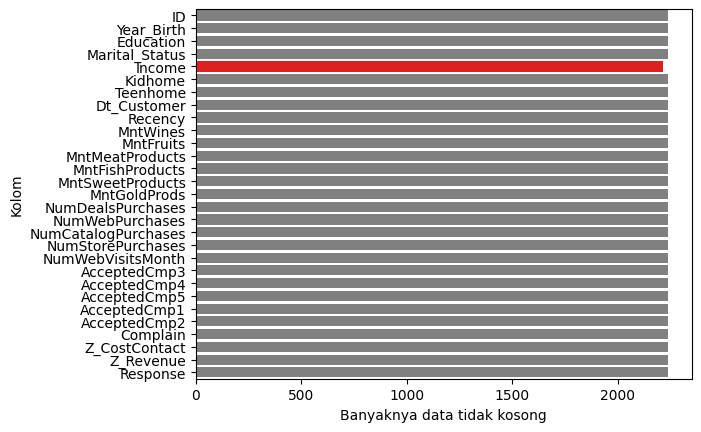

In [7]:
# Melihat banyaknya data kosong dengan bar chart 
col = df.columns
row = df.count()

clrs = ['red' if (x < len(df)) else 'gray' for x in row]
sns.barplot(x=row, y=col, palette=clrs, hue= col, orient='h')
plt.xlabel("Banyaknya data tidak kosong")
plt.ylabel("Kolom")
plt.show()

In [8]:
# Cek data yang kolom Income kosong
df[df["Income"].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [9]:
# Meskipun 24 customer tersebut memiliki income yang tidak diketahui, tidak dapat dianggap sebagai 0 
# karena mereka tetap bisa membeli barang. Lebih tepat untuk mengasumsikan income mereka tidak menentu.
# Contoh: freelancer, sumber uang dari pemberian orang lain, sumber uang dari pendapatan tidak tetap, dll.

# Asumsikan pendapatan mereka sama dengan rata2 pendapatan customer lain
df["Income"] = df["Income"].fillna(df["Income"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
# Melihat berapa banyak nilai unik di tiap kolom
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [12]:
# Karena kolom Z_CostContact dan Z_Revenue hanya memiliki 1 nilai unik, tidak dapat dilakukan analisis terhadapnya
# Kolom tersebut dibuang dari data frame
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [13]:
# Cek kolom marital status
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [14]:
# Ada 3 kategori yang seharusnya bisa dihitung sebagai Single
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x in ['Alone','Absurd','YOLO'] else x)
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64

In [15]:
# Cek outlier
pd.set_option('display.max_columns', None)
df.describe().loc[['min','max']]

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
min,0.0,1893.0,1730.0,0.0,0.0,2012-07-30 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,11191.0,1996.0,666666.0,2.0,2.0,2014-06-29 00:00:00,99.0,1493.0,199.0,1725.0,259.0,263.0,362.0,15.0,27.0,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<Axes: ylabel='Income'>

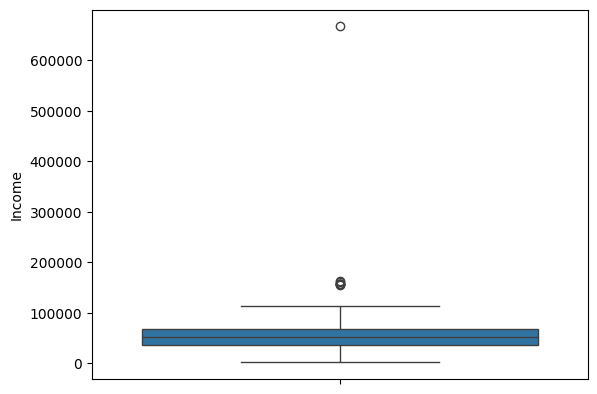

In [16]:
# Nilai min dan max kolom Income berbeda jauh, maka akan dicek apakah ada outlier menggunakan boxplot

sns.boxplot(df["Income"])

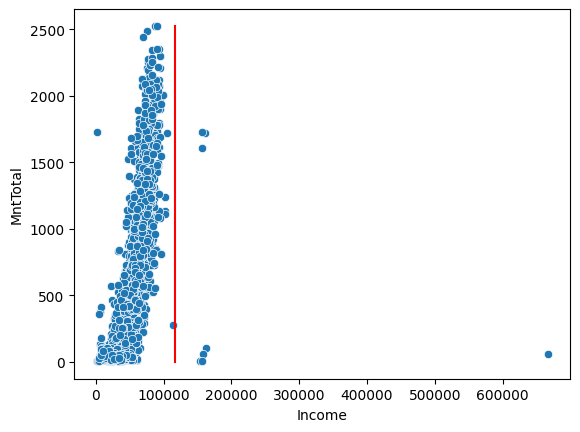

In [17]:
# Cek hubungan antara income dengan jumlah pembelian pelanggan

# Menambah kolom total pembelian pelanggan
df["MntTotal"] = df[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].sum(axis=1)

# Menghitung IQR
q1 = df["Income"].quantile(0.25)
q3 = df["Income"].quantile(0.75)
iqr= q3 - q1

# Dari boxplot kita tahu bahwa outlier adalah outlier atas
out_top = iqr*1.5 + q3

sns.scatterplot(x="Income",y="MntTotal", data=df)
# Garis batas upper fence
plt.plot([out_top, out_top], [0, max(df["MntTotal"])], color="red")

Persen kehilangan:0.35714285714285715%


<Axes: xlabel='Income', ylabel='MntTotal'>

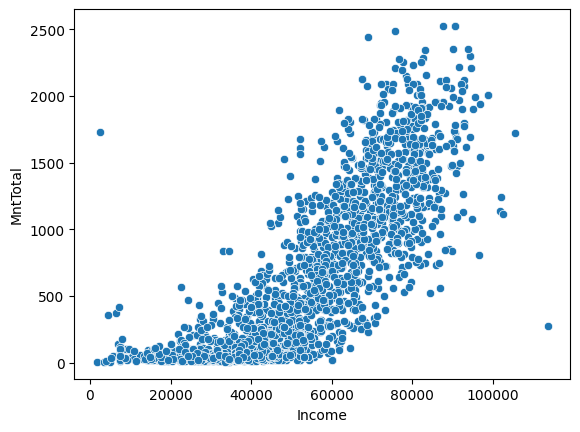

In [18]:
# Data outlier tidak mengikuti persebaran data yang lain sehingga sebaiknya dihapus
df_clean = df[df["Income"] <= out_top]

print(f"Persen kehilangan:{(len(df)-len(df_clean))*100/len(df)}%")
sns.scatterplot(x="Income",y="MntTotal", data=df_clean)

In [19]:
# Terlihat ada 2 outlier global di scatterplot di atas
# Akan tetapi kedua outlier tersebut "bersebrangan"
# Menentukan outlier tersebut dihapus atau tidak akan dilakukan di bagian analisis data,
# untuk sekarang outlier tersebut tidak dibuang terlebih dahulu.

In [20]:
# Cek data duplikat
print(f"Banyak data duplikat: {df_clean.duplicated().sum()}")

Banyak data duplikat: 0


In [21]:
#Tidak ada data duplikat, data cleaning selesai.

## Data Visualization

In [22]:
df_clean.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntTotal
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422


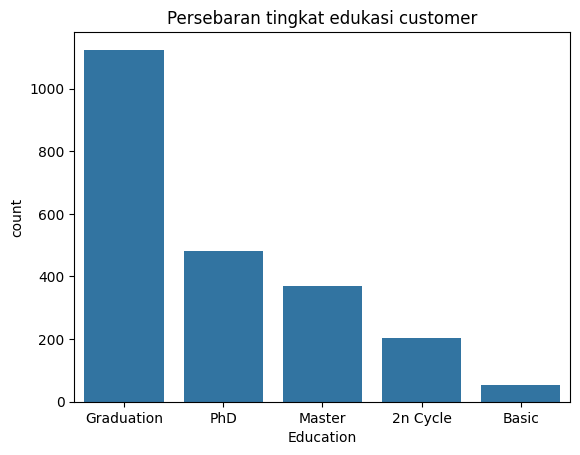

In [23]:
# Persebaran tingkat edukasi customer (bar)
edbar = df_clean['Education'].value_counts()
sns.barplot(edbar)
plt.title("Persebaran tingkat edukasi customer")
plt.show()

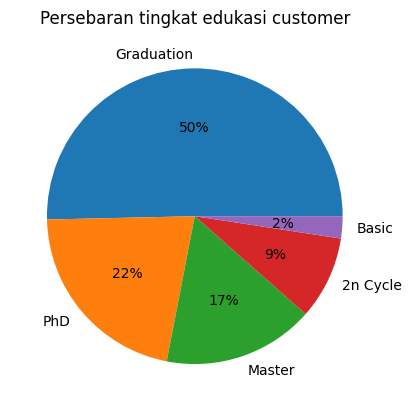

In [24]:
# Persebaran tingkat edukasi customer (pie)
edbar = df_clean['Education'].value_counts().reset_index()
edbar = pd.DataFrame(edbar)
plt.pie(edbar['count'], labels=edbar['Education'],autopct='%.0f%%')
plt.title("Persebaran tingkat edukasi customer")
plt.show()

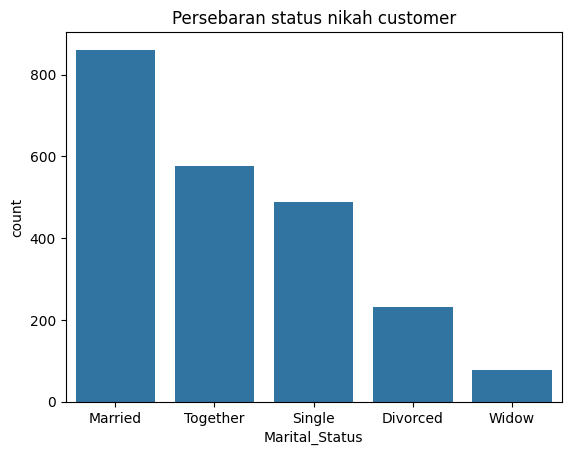

In [25]:
# Persebaran marital status customer (bar)
mrbar = df_clean['Marital_Status'].value_counts()
sns.barplot(mrbar)
plt.title("Persebaran status nikah customer")
plt.show()

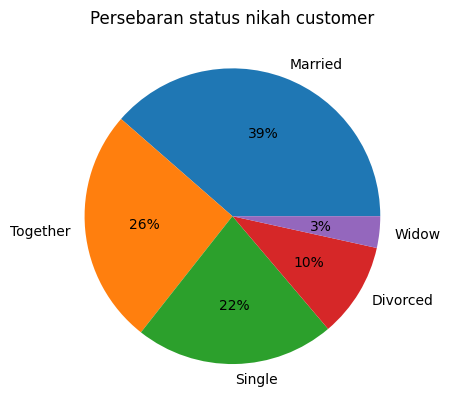

In [26]:
# Persebaran tingkat edukasi customer (pie)
mrbar = df_clean['Marital_Status'].value_counts().reset_index()
mrbar = pd.DataFrame(mrbar)
plt.pie(mrbar['count'], labels=mrbar['Marital_Status'],autopct='%.0f%%')
plt.title("Persebaran status nikah customer")
plt.show()

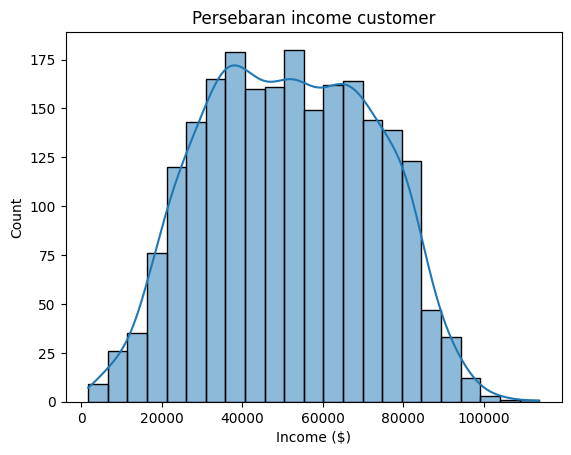

In [27]:
# Persebaran income customer (hist)
sns.histplot(df_clean['Income'], kde=True)
plt.title("Persebaran income customer")
plt.xlabel("Income ($)")
plt.show()

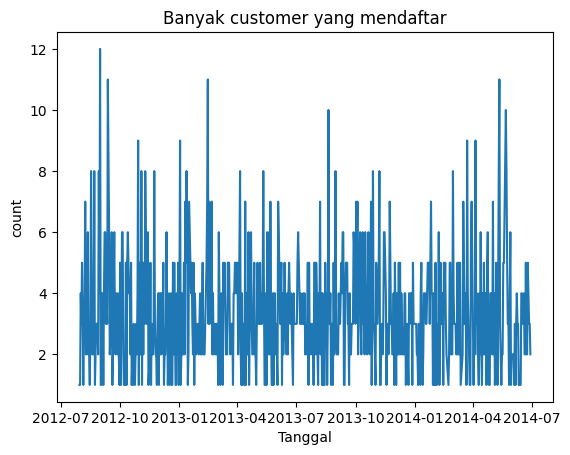

In [28]:
# Persebaran tanggal daftar customer (line)
dtcust = df_clean['Dt_Customer'].value_counts().reset_index()
sns.lineplot(data=dtcust, x="Dt_Customer",y="count")
plt.title("Banyak customer yang mendaftar")
plt.xlabel("Tanggal")
plt.show()


In [29]:
dtcust.sort_values
dtcust.head(10)

,Dt_Customer,count
0,2012-08-31,12
1,2014-05-12,11
2,2013-02-14,11
3,2012-09-12,11
4,2013-08-20,10
5,2014-05-22,10
6,2014-04-05,9
7,2012-10-29,9
8,2013-01-02,9
9,2014-03-23,9


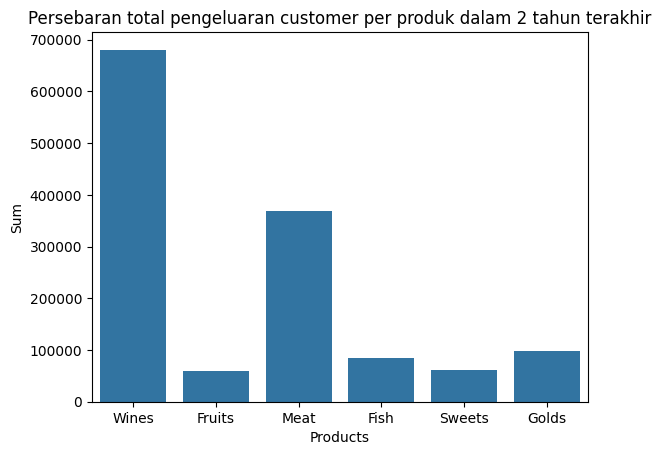

In [30]:
# Persebaran product yg dibeli customer (bar)
prod = {"Products":['Wines','Fruits','Meat','Fish','Sweets','Golds']}
prod["Sum"] = [sum(df_clean['MntWines']),sum(df_clean['MntFruits']),sum(df_clean['MntMeatProducts']),
               sum(df_clean['MntFishProducts']), sum(df_clean['MntSweetProducts']),sum(df_clean['MntGoldProds'])]
prod = pd.DataFrame(prod)

sns.barplot(data=prod,x='Products',y='Sum')
plt.title("Persebaran total pengeluaran customer per produk dalam 2 tahun terakhir")
plt.show()

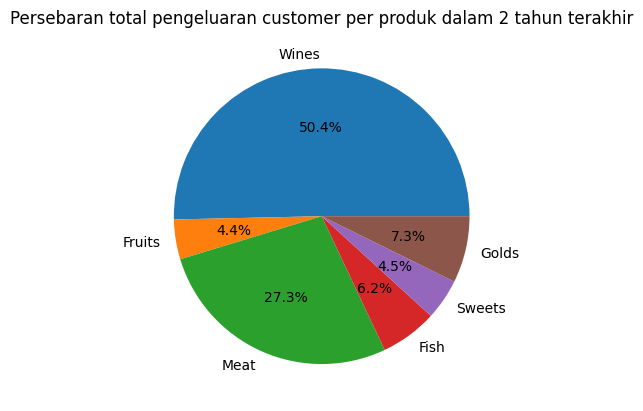

In [31]:
plt.pie(prod["Sum"], labels=prod["Products"],autopct='%.01f%%')
plt.title("Persebaran total pengeluaran customer per produk dalam 2 tahun terakhir")
plt.show()

In [32]:
prod

,Products,Sum
0,Wines,680604
1,Fruits,58881
2,Meat,368993
3,Fish,84023
4,Sweets,60611
5,Golds,98579


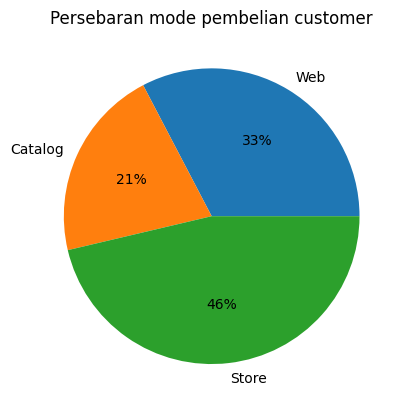

In [33]:
# Persebaran mode pembelian customer
type_purchase = {"Type":["Web","Catalog","Store"]}
type = ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
type_purchase["Sum"] = [sum(df_clean[x]) for x in type]
type_purchase=pd.DataFrame(type_purchase)
plt.pie(type_purchase["Sum"], labels=type_purchase["Type"],autopct='%.0f%%')

plt.title("Persebaran mode pembelian customer")
plt.show()

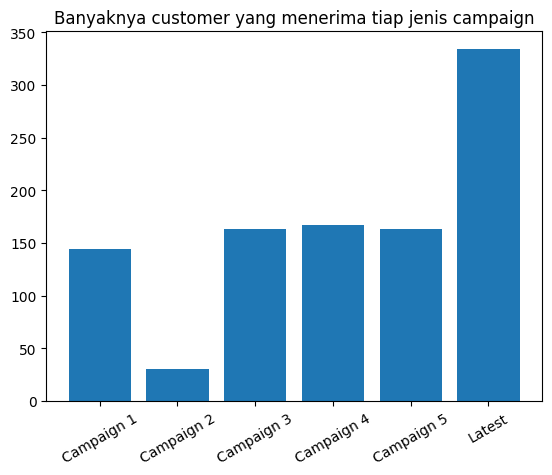

In [34]:
# Banyaknya customer yang menerima tiap jenis campaign
cmp = {"Type":["Campaign 1","Campaign 2","Campaign 3","Campaign 4","Campaign 5","Latest"]}
cmpnum = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]
cmp["Sum"] = [sum(df_clean[x]) for x in cmpnum]
cmp=pd.DataFrame(cmp)

plt.bar(cmp["Type"],cmp["Sum"])
plt.title("Banyaknya customer yang menerima tiap jenis campaign")
plt.xticks(rotation=30)
plt.show()


In [35]:
cmp

,Type,Sum
0,Campaign 1,144
1,Campaign 2,30
2,Campaign 3,163
3,Campaign 4,167
4,Campaign 5,163
5,Latest,334


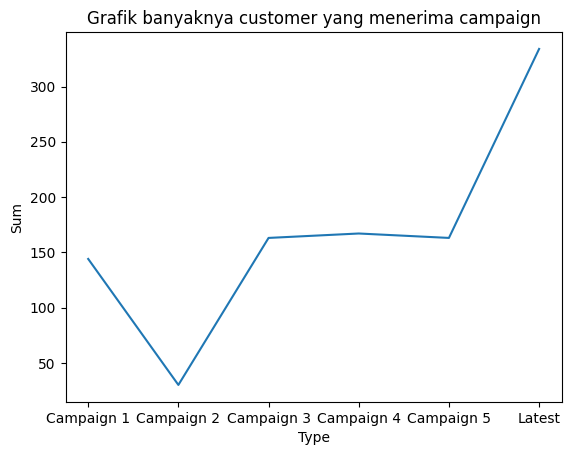

In [36]:
# Grafik banyaknya customer yang menerima campaign
sns.lineplot(x="Type",y="Sum",data=cmp)
plt.title("Grafik banyaknya customer yang menerima campaign")
plt.show()

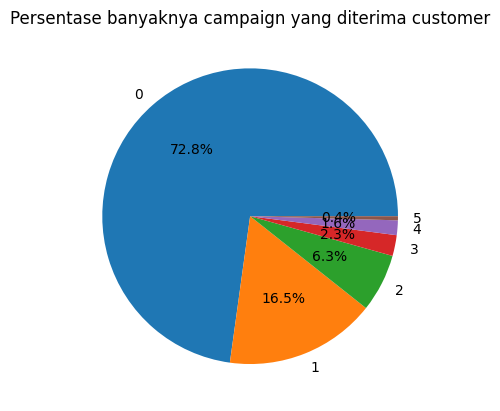

In [37]:
acceptcmp = pd.DataFrame(df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1).value_counts().reset_index())

plt.pie(acceptcmp["count"], labels=acceptcmp["index"],autopct='%.01f%%')
plt.title("Persentase banyaknya campaign yang diterima customer")
plt.show()

## Data Analysis

In [38]:
df_clean.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntTotal
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422


Pertanyaan-pertanyaan yang ingin dijawab:
1. Apakah rata-rata income customer dengan tingkat edukasi yang berbeda adalah sama?
2. Apakah rata-rata total pembelian customer dengan tingkat edukasi yang berbeda adalah sama?
3. Apa hubungan antara income dengan total pembelian produk?
4. Apakah rata-rata total pembelian customer dengan anak (kid+teen) dibandingkan dengan yg tidak punya anak adalah sama?
5. Apakah rata-rata total pembelian customer dengan kid dan customer dengan teen adalah sama?
6. Apakah rata-rata total pembelian customer dengan status nikah berbeda adalah sama?
7. Apakah rata-rata pembelian tiap jenis produk adalah sama?
8. Apakah rata-rata income customer yang menerima campaign sama dengan rata-rata income customer yang tidak menerima campaign?
9. Apakah rata-rata total pembelian customer yang menerima campaign sama dengan rata-rata total pembelian customer yang tidak menerima campaign?

In [39]:
import scipy.stats as stats

### 1. Apakah rata-rata income customer dengan tingkat edukasi yang berbeda adalah sama?

In [40]:
# Pertama akan cek distribusi income customer adalah distribusi normal atau tidak
print(stats.kstest(df_clean[df_clean["Education"]=="Graduation"]['Income'],'norm'))
print(stats.kstest(df_clean[df_clean["Education"]=="PhD"]['Income'],'norm'))
print(stats.kstest(df_clean[df_clean["Education"]=="Master"]['Income'],'norm'))
print(stats.kstest(df_clean[df_clean["Education"]=="2n Cycle"]['Income'],'norm'))
print(stats.kstest(df_clean[df_clean["Education"]=="Basic"]['Income'],'norm'))

KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(1730.0), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(4023.0), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(6560.0), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(7500.0), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(7500.0), statistic_sign=np.int8(-1))


Karena pvalue income setiap kelas education lebih kecil dari 0.05 makan disimpulkan distribusi tidak normal

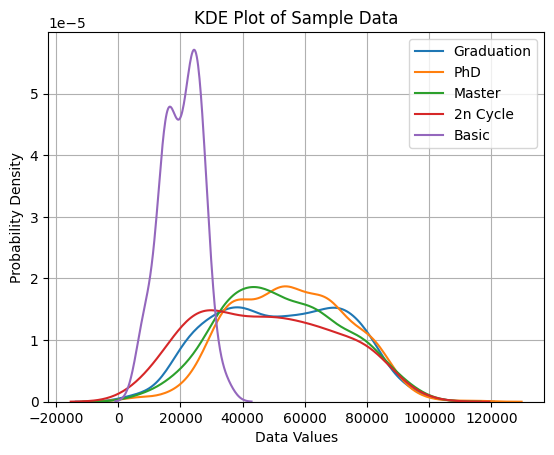

In [41]:
# Non parametrik
y1 = df_clean[df_clean["Education"]=="Graduation"]['Income']
y2 = df_clean[df_clean["Education"]=="PhD"]['Income']
y3 = df_clean[df_clean["Education"]=="Master"]['Income']
y4 = df_clean[df_clean["Education"]=="2n Cycle"]['Income']
y5 = df_clean[df_clean["Education"]=="Basic"]['Income']
# KDE plot

sns.kdeplot(y1);sns.kdeplot(y2);sns.kdeplot(y3);sns.kdeplot(y4);sns.kdeplot(y5)
 
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['Graduation','PhD','Master','2n Cycle','Basic'])
plt.grid(True)
 
# Display the plot
plt.show()

Dari grafik KDE di atas jelas bahwa untuk kelas education Basic, rata-rata income customer lebih rendah dari kelas lainnya.
<br> Selanjutnya akan dilihat apakah rata-rata untuk 4 kelas lainnya itu adalah sama

Karena data adalah nonparametrik maka yang dibandingkan adalah median
<br>H0: Median income customer untuk kelas education selain Basic adalah sama
<br>H1: Median income customer untuk kelas education selain basic berbeda

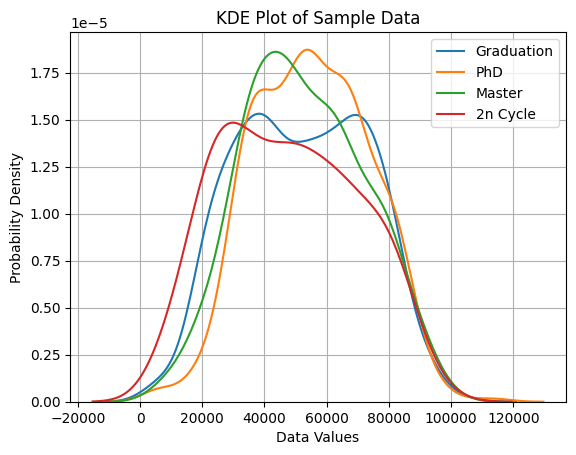

In [42]:
# KDE plot

sns.kdeplot(y1);sns.kdeplot(y2);sns.kdeplot(y3);sns.kdeplot(y4)
 
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['Graduation','PhD','Master','2n Cycle'])
plt.grid(True)
 
# Display the plot
plt.show()

In [43]:
# Kruskal-Wallis Test
statistic, pvalue = stats.kruskal(y1,y2,y3,y4)
 
# Print test results
print("Test Statistic:", statistic)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("H0 ditolak: ada perbedaan median income customer untuk kelas education selain basic.")
else:
    print("Gagal menolak H0: median income customer untuk kelas education selain Basic adalah sama.")

Test Statistic: 19.651684060758864
p-value: 0.00020042306857572122
H0 ditolak: ada perbedaan median income customer untuk kelas education selain basic.


In [44]:
print(f"Median y1: {y1.median()}")
print(f"Median y2: {y2.median()}")
print(f"Median y3: {y3.median()}")
print(f"Median y4: {y4.median()}")
print(f"Median y5: {y5.median()}")

Median y1: 52247.25135379061
Median y2: 54919.5
Median y3: 50965.0
Median y4: 46891.0
Median y5: 20744.0


Disimpulkan terdapat perbedaan median income customer untuk kelas education berbeda. Namun, apabila yang ditinjau hanya grup 1,2, dan 3, maka median ketiganya sama.

### 2. Apakah rata-rata total pembelian customer dengan tingkat edukasi yang berbeda adalah sama?

In [45]:
# Pertama akan cek distribusi total pembelian customer adalah distribusi normal atau tidak
print(stats.kstest(df_clean[df_clean["Education"]=="Graduation"]['MntTotal'],'norm'))
print(stats.kstest(df_clean[df_clean["Education"]=="PhD"]['MntTotal'],'norm'))
print(stats.kstest(df_clean[df_clean["Education"]=="Master"]['MntTotal'],'norm'))
print(stats.kstest(df_clean[df_clean["Education"]=="2n Cycle"]['MntTotal'],'norm'))
print(stats.kstest(df_clean[df_clean["Education"]=="Basic"]['MntTotal'],'norm'))

KstestResult(statistic=np.float64(0.9999997133484281), pvalue=np.float64(0.0), statistic_location=np.int64(5), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.9999999999999993), pvalue=np.float64(0.0), statistic_location=np.int64(8), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.int64(10), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.int64(13), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.int64(14), statistic_sign=np.int8(-1))


Karena pvalue income setiap kelas education lebih kecil dari 0.05 makan disimpulkan distribusi tidak normal

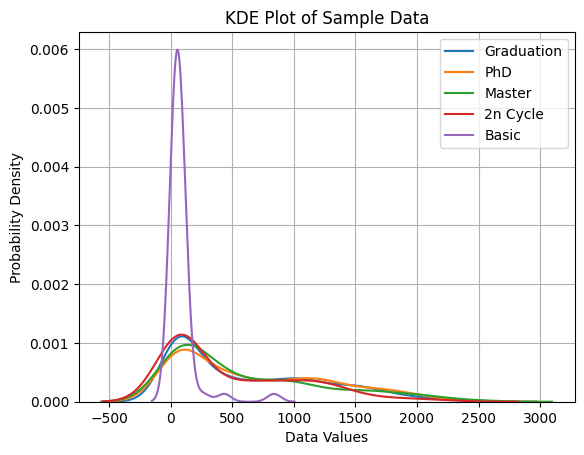

In [46]:
# Non parametrik
y1 = df_clean[df_clean["Education"]=="Graduation"]['MntTotal']
y2 = df_clean[df_clean["Education"]=="PhD"]['MntTotal']
y3 = df_clean[df_clean["Education"]=="Master"]['MntTotal']
y4 = df_clean[df_clean["Education"]=="2n Cycle"]['MntTotal']
y5 = df_clean[df_clean["Education"]=="Basic"]['MntTotal']
# KDE plot

sns.kdeplot(y1);sns.kdeplot(y2);sns.kdeplot(y3);sns.kdeplot(y4);sns.kdeplot(y5)
 
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['Graduation','PhD','Master','2n Cycle','Basic'])
plt.grid(True)
 
# Display the plot
plt.show()

Dari grafik KDE di atas jelas bahwa untuk kelas education Basic, rata-rata total pembelian customer lebih rendah dari kelas lainnya.
<br> Selanjutnya akan dilihat apakah rata-rata untuk 4 kelas lainnya itu adalah sama

Karena data adalah nonparametrik maka yang dibandingkan adalah median
<br>H0: Median total pembelian customer untuk kelas education selain Basic adalah sama
<br>H1: Median total pembelian customer untuk kelas education selain basic berbeda

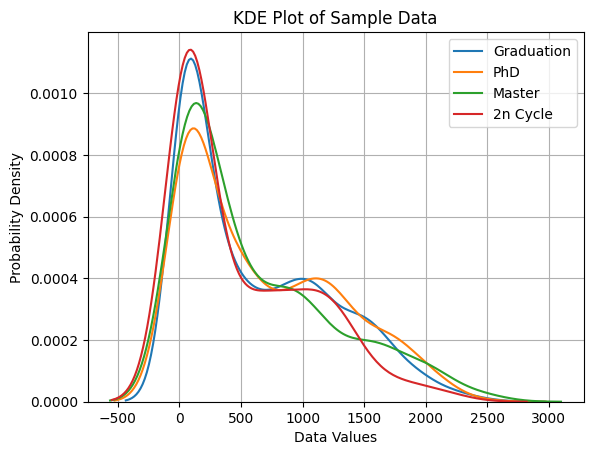

In [47]:
# KDE plot

sns.kdeplot(y1);sns.kdeplot(y2);sns.kdeplot(y3);sns.kdeplot(y4)
 
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['Graduation','PhD','Master','2n Cycle'])
plt.grid(True)
 
# Display the plot
plt.show()

In [48]:
# Kruskal-Wallis Test
statistic, pvalue = stats.kruskal(y1,y2,y3,y4)
 
# Print test results
print("Test Statistic:", statistic)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("H0 ditolak: ada perbedaan median total pembelian customer untuk kelas education selain basic.")
else:
    print("Gagal menolak H0: median total pembelian customer untuk kelas education selain Basic adalah sama.")

Test Statistic: 12.411895030304334
p-value: 0.00609748630161189
H0 ditolak: ada perbedaan median total pembelian customer untuk kelas education selain basic.


In [49]:
print(f"Median y1: {y1.median()}")
print(f"Median y2: {y2.median()}")
print(f"Median y3: {y3.median()}")
print(f"Median y4: {y4.median()}")
print(f"Median y5: {y5.median()}")

Median y1: 414.5
Median y2: 493.0
Median y3: 390.0
Median y4: 198.0
Median y5: 57.0


Disimpulkan terdapat perbedaan median total pembelian customer untuk kelas education berbeda. Namun apabila yang dibandingkan hanya grup 1,2, dan 3, maka median ketiganya sama.

### 3. Apa hubungan antara income dengan total pembelian produk?

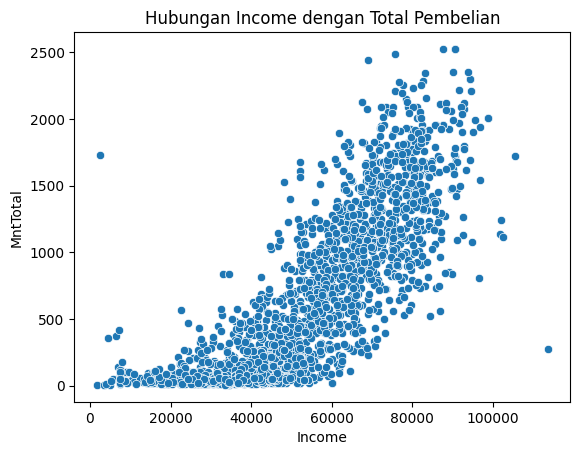

In [50]:
# Scatter plot
sns.scatterplot(x="Income",y="MntTotal", data=df_clean)
plt.title("Hubungan Income dengan Total Pembelian")
plt.show()

In [51]:
print(df_clean[['Income','MntTotal']].corr('kendall'))

            Income  MntTotal
Income    1.000000  0.653563
MntTotal  0.653563  1.000000


In [52]:
# Menghilangkan outlier
drop1 = df_clean[(df_clean['Income'] > 100000) & (df_clean['MntTotal'] < 500)]['ID']
drop2 = df_clean[(df_clean['Income'] < 10000) & (df_clean['MntTotal'] > 1500)]['ID']

df2 = df_clean.drop(drop1.index)
df2 = df2.drop(drop2.index)
print(df2[['Income','MntTotal']].corr('kendall'))

            Income  MntTotal
Income    1.000000  0.655628
MntTotal  0.655628  1.000000


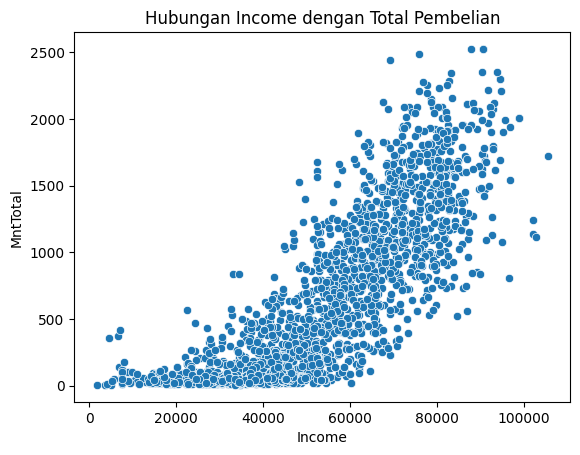

In [53]:
# Scatter plot
sns.scatterplot(x="Income",y="MntTotal", data=df2)
plt.title("Hubungan Income dengan Total Pembelian")
plt.show()

Disimpulkan Income dan Total Pembelian memiliki korelasi positif yang cukup kuat. Artinya semakin tinggi income customer, maka semakin banyak pengeluaran customer.

### 4. Apakah rata-rata total pembelian customer dengan anak (kid+teen) dibandingkan dengan yg tidak punya anak adalah sama?

In [54]:
# Pertama akan cek distribusi adalah distribusi normal atau tidak
print(stats.kstest(df_clean[(df_clean["Kidhome"]>0) | (df_clean["Teenhome"]>0)]['MntTotal'],'norm'))
print(stats.kstest(df_clean[(df_clean["Kidhome"]==0) & (df_clean["Teenhome"]==0)]['MntTotal'],'norm'))

KstestResult(statistic=np.float64(0.9999997133484281), pvalue=np.float64(0.0), statistic_location=np.int64(5), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.9999999990134123), pvalue=np.float64(0.0), statistic_location=np.int64(6), statistic_sign=np.int8(-1))


Data tidak berdistribusi normal

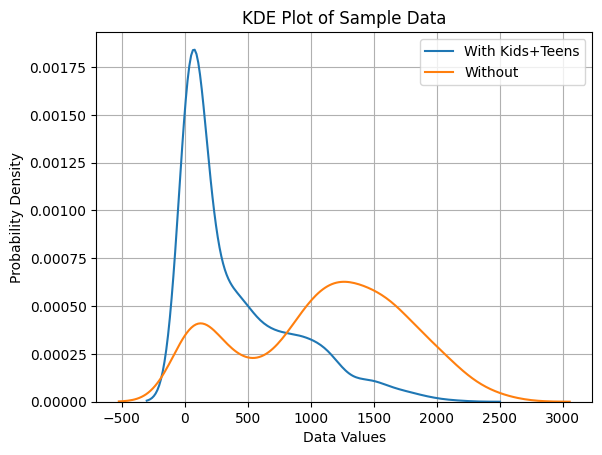

In [55]:
# Non parametrik
y1 = df_clean[(df_clean["Kidhome"]>0) | (df_clean["Teenhome"]>0)]['MntTotal']
y2 = df_clean[(df_clean["Kidhome"]==0) & (df_clean["Teenhome"]==0)]['MntTotal']

# KDE plot

sns.kdeplot(y1);sns.kdeplot(y2)
 
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['With Kids+Teens','Without'])
plt.grid(True)
 
# Display the plot
plt.show()

In [56]:
df_clean[(df_clean["Kidhome"]==0) & (df_clean["Teenhome"]==0)]['MntTotal'].median()

np.float64(1189.5)

Hanya dari melihat KDE plot di atas, sudah jelas bahwa rata-rata total pembelian customer dari dua grup tersebut berbeda.
<br> Menariknya, tampaknya customer yang tidak memiliki anak/remaja di rumah berbelanja lebih banyak

In [57]:
df_clean.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntTotal
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422


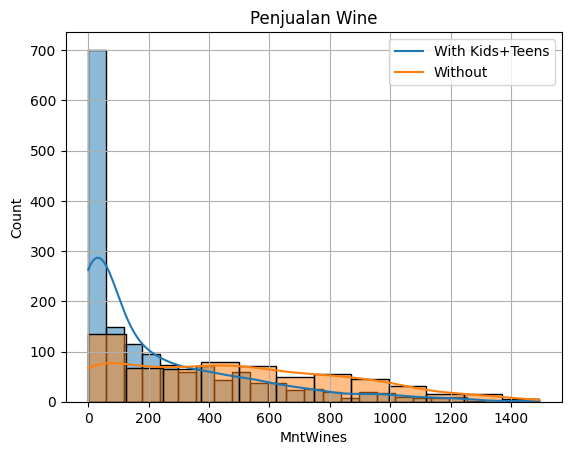

In [58]:
# Cek untuk penjualan Wine karena merupakan kategori dengan penjualan tertinggi

y1 = df_clean[(df_clean["Kidhome"]>0) | (df_clean["Teenhome"]>0)]['MntWines']
y2 = df_clean[(df_clean["Kidhome"]==0) & (df_clean["Teenhome"]==0)]['MntWines']

# Hist+KDE plot

sns.histplot(y1, kde=True);sns.histplot(y2, kde=True)
 
# Customize the plot (optional)
plt.title('Penjualan Wine')
plt.legend(['With Kids+Teens','Without'])
plt.grid(True)
 
# Display the plot
plt.show()

Customer dengan anak/remaja di rumah tampaknya lebih hati-hati dalam membeli barang sehingga pengeluaran lebih sedikit dan secara general jarang membeli Wine

### 5. Apakah rata-rata total pembelian customer dengan kid dan customer dengan teen adalah sama?

In [59]:
# Pertama akan cek distribusi adalah distribusi normal atau tidak
print(stats.kstest(df_clean[df_clean["Kidhome"]>0]['MntTotal'],'norm'))
print(stats.kstest(df_clean[df_clean["Teenhome"]>0]['MntTotal'],'norm'))

KstestResult(statistic=np.float64(0.9999997133484281), pvalue=np.float64(0.0), statistic_location=np.int64(5), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.9999999999999993), pvalue=np.float64(0.0), statistic_location=np.int64(8), statistic_sign=np.int8(-1))


Data tidak berdistribusi normal

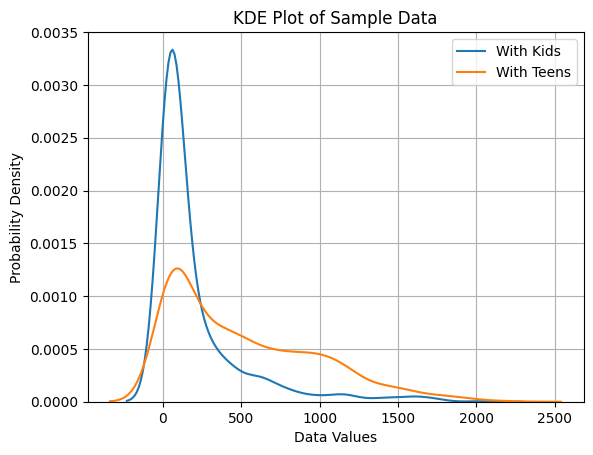

In [60]:
# Non parametrik
y1 = df_clean[df_clean["Kidhome"]>0]['MntTotal']
y2 = df_clean[df_clean["Teenhome"]>0]['MntTotal']

# KDE plot

sns.kdeplot(y1);sns.kdeplot(y2)
 
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['With Kids','With Teens'])
plt.grid(True)
 
# Display the plot
plt.show()

Karena data adalah nonparametrik maka yang dibandingkan adalah median
<br>H0: Median total pengeluaran customer kedua grup adalah sama
<br>H1: Median total pengeluaran customer kedua grup berbeda

In [61]:
# Wilcoxon Rank-Sum Test
statistic, pvalue = stats.ranksums(y1, y2)
 
# Print test results
print("Test Statistic:", statistic)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("H0 ditolak: ada perbedaan median total pembelian customer kedua grup.")
else:
    print("Gagal menolak H0: median total pembelian customer kedua grup adalah sama.")

Test Statistic: -17.265052440741215
p-value: 8.62254702310448e-67
H0 ditolak: ada perbedaan median total pembelian customer kedua grup.


In [62]:
df_clean[df_clean["Teenhome"]>0]['MntTotal'].median()

np.float64(400.5)

### 6. Apakah rata-rata total pembelian customer dengan status nikah berbeda adalah sama?

In [63]:
df_clean["Marital_Status"].value_counts()

Marital_Status
Married     861
Together    576
Single      487
Divorced    231
Widow        77
Name: count, dtype: int64

In [64]:
# Pertama akan cek distribusi adalah distribusi normal atau tidak
print(stats.kstest(df_clean[df_clean["Marital_Status"]=="Married"]['MntTotal'],'norm'))
print(stats.kstest(df_clean[df_clean["Marital_Status"]=="Together"]['MntTotal'],'norm'))
print(stats.kstest(df_clean[df_clean["Marital_Status"]=="Single"]['MntTotal'],'norm'))
print(stats.kstest(df_clean[df_clean["Marital_Status"]=="Divorced"]['MntTotal'],'norm'))
print(stats.kstest(df_clean[df_clean["Marital_Status"]=="Widow"]['MntTotal'],'norm'))

KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.int64(9), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.9999999999999993), pvalue=np.float64(0.0), statistic_location=np.int64(8), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.9999997133484281), pvalue=np.float64(0.0), statistic_location=np.int64(5), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.9999999990134123), pvalue=np.float64(0.0), statistic_location=np.int64(6), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.int64(15), statistic_sign=np.int8(-1))


Data tidak berdistribusi normal

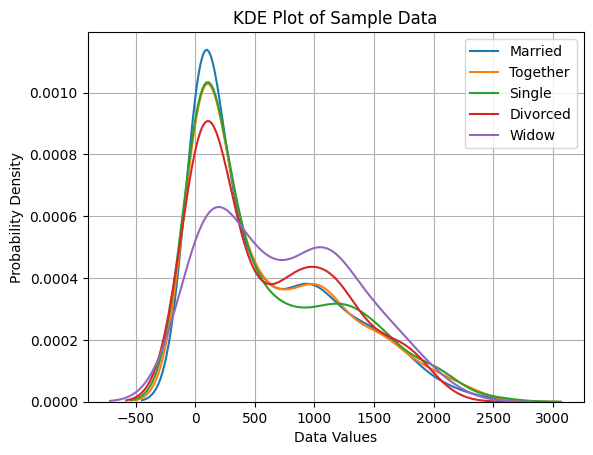

In [65]:
# Non parametrik
y1 = df_clean[df_clean["Marital_Status"]=="Married"]['MntTotal']
y2 = df_clean[df_clean["Marital_Status"]=="Together"]['MntTotal']
y3 = df_clean[df_clean["Marital_Status"]=="Single"]['MntTotal']
y4 = df_clean[df_clean["Marital_Status"]=="Divorced"]['MntTotal']
y5 = df_clean[df_clean["Marital_Status"]=="Widow"]['MntTotal']

# KDE plot

sns.kdeplot(y1);sns.kdeplot(y2);sns.kdeplot(y3);sns.kdeplot(y4);sns.kdeplot(y5)
 
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['Married','Together','Single','Divorced','Widow'])
plt.grid(True)
 
# Display the plot
plt.show()

Karena data adalah nonparametrik maka yang dibandingkan adalah median
<br>H0: Median total pembelian customer untuk semua grup adalah sama
<br>H1: Median total pembelian customer untuk semua grup berbeda

In [66]:
print(y1.median())
print(y2.median())
print(y3.median())
print(y4.median())
print(y5.median())

396.0
396.0
369.0
400.0
636.0


In [67]:
import numpy as np
np.mean([396,396,269,400,636])

np.float64(419.4)

In [68]:
# Kruskal-Wallis Test

statistic, pvalue = stats.kruskal(y1,y2,y3,y4,y5)
 
# Print test results
print("Test Statistic:", statistic)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("H0 ditolak: ada perbedaan median total pembelian customer untuk semua grup.")
else:
    print("Gagal menolak H0: median total pembelian customer untuk semua grup adalah sama.")

Test Statistic: 6.071209875695318
p-value: 0.19389301817631124
Gagal menolak H0: median total pembelian customer untuk semua grup adalah sama.


Disimpulkan median semua grup adalah sama. Namun apabila ditinjau pair-wise maka median grup 1 dengan grup 5, grup 2 dengan grup 5, dan grup 3 dengan grup 5 adalah berbeda.

### 7. Apakah rata-rata pembelian tiap jenis produk adalah sama?

In [69]:
# Pertama akan cek distribusi total pembelian customer adalah distribusi normal atau tidak
print(stats.kstest(df_clean['MntWines'],'norm'))
print(stats.kstest(df_clean['MntFruits'],'norm'))
print(stats.kstest(df_clean['MntFishProducts'],'norm'))
print(stats.kstest(df_clean['MntMeatProducts'],'norm'))
print(stats.kstest(df_clean['MntSweetProducts'],'norm'))
print(stats.kstest(df_clean['MntGoldProds'],'norm'))

KstestResult(statistic=np.float64(0.9587755499970437), pvalue=np.float64(0.0), statistic_location=np.int64(3), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.7276978967256559), pvalue=np.float64(0.0), statistic_location=np.int64(2), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.8020706565822867), pvalue=np.float64(0.0), statistic_location=np.int64(2), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.9793848689934594), pvalue=np.float64(0.0), statistic_location=np.int64(3), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.7200814092704588), pvalue=np.float64(0.0), statistic_location=np.int64(2), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.9190061404532545), pvalue=np.float64(0.0), statistic_location=np.int64(2), statistic_sign=np.int8(-1))


Data tidak berdistribusi normal

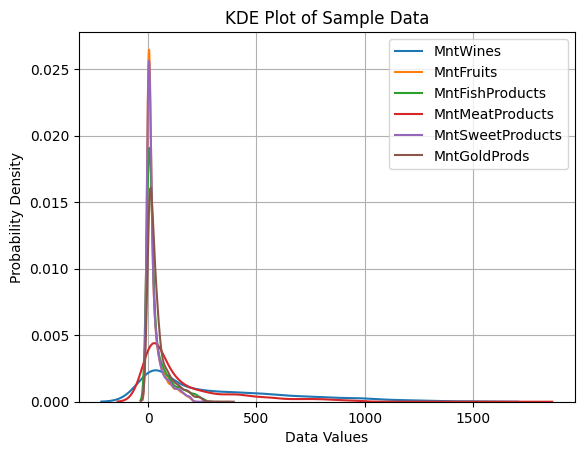

In [70]:
# Non parametrik
y1 = df_clean['MntWines']
y2 = df_clean['MntFruits']
y3 = df_clean['MntFishProducts']
y4 = df_clean['MntMeatProducts']
y5 = df_clean['MntSweetProducts']
y6 = df_clean['MntGoldProds']
# KDE plot

sns.kdeplot(y1);sns.kdeplot(y2);sns.kdeplot(y3);sns.kdeplot(y4);sns.kdeplot(y5);sns.kdeplot(y6)
 
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['MntWines','MntFruits','MntFishProducts','MntMeatProducts','MntSweetProducts','MntGoldProds'])
plt.grid(True)
 
# Display the plot
plt.show()


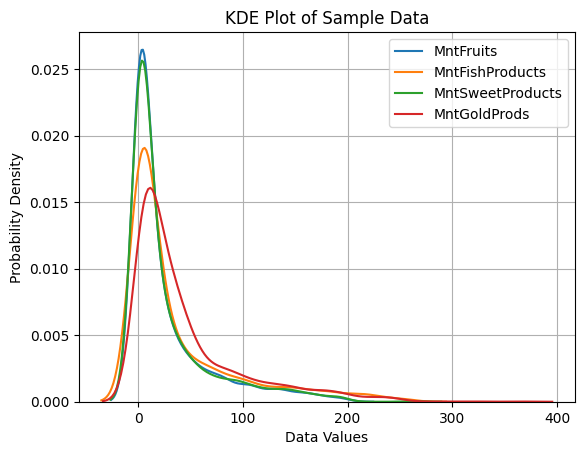

In [71]:
# KDE plot

sns.kdeplot(y2);sns.kdeplot(y3);sns.kdeplot(y5);sns.kdeplot(y6)
 
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['MntFruits','MntFishProducts','MntSweetProducts','MntGoldProds'])
plt.grid(True)
 
# Display the plot
plt.show()

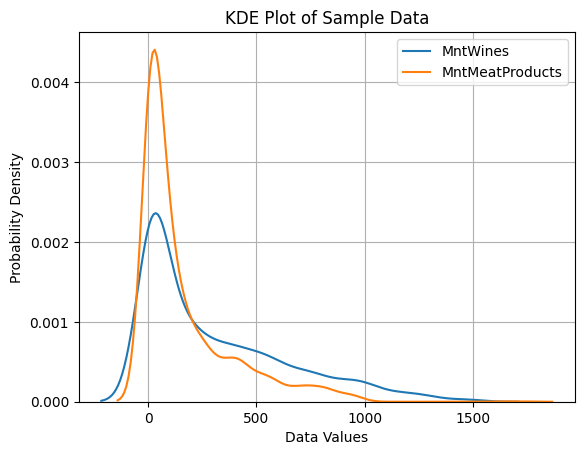

In [72]:
# KDE plot

sns.kdeplot(y1);sns.kdeplot(y4)
 
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['MntWines','MntMeatProducts'])
plt.grid(True)
 
# Display the plot
plt.show()

Karena data adalah nonparametrik maka yang dibandingkan adalah median
<br>H0: Median total pengeluaran customer 6 grup adalah sama
<br>H1: Median total pengeluaran customer 6 grup berbeda

In [73]:
# Kruskal-Wallis Test
statistic, pvalue = stats.kruskal(y1,y2,y3,y4,y5,y6)
 
# Print test results
print("Test Statistic:", statistic)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("H0 ditolak: ada perbedaan median pembelian di kategori Wine, Fruit, Fish, Meat, Sweet, dan Gold.")
else:
    print("Gagal menolak H0: median pembelian di kategori Wine, Fruit, Fish, Meat, Sweet, dan Gold adalah sama.")

Test Statistic: 3163.117457100269
p-value: 0.0
H0 ditolak: ada perbedaan median pembelian di kategori Wine, Fruit, Fish, Meat, Sweet, dan Gold.


Karena data adalah nonparametrik maka yang dibandingkan adalah median
<br>H0: Median total pengeluaran customer untuk jenis produk Fruit dan Sweet adalah sama
<br>H1: Median total pengeluaran customer untuk jenis produk Fruit dan Sweet grup berbeda

In [74]:
# Kruskal-Wallis Test
statistic, pvalue = stats.kruskal(y2,y5)
 
# Print test results
print("Test Statistic:", statistic)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("H0 ditolak: ada perbedaan median pembelian di kategori Fruit dan Sweet.")
else:
    print("Gagal menolak H0: median pembelian di kategori Fruit dan Sweet adalah sama.")

Test Statistic: 0.0010114623866548196
p-value: 0.9746287582818979
Gagal menolak H0: median pembelian di kategori Fruit dan Sweet adalah sama.


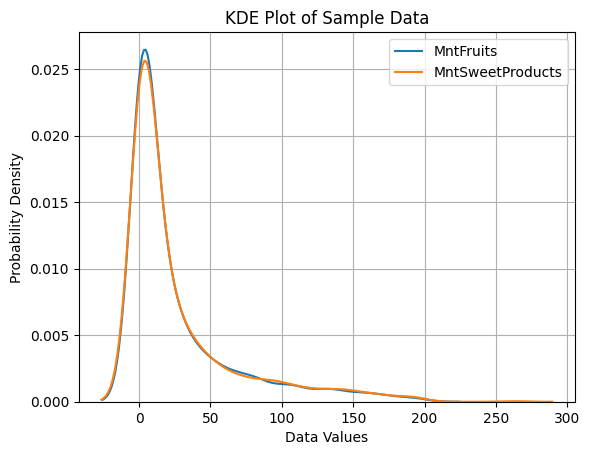

In [75]:
# KDE plot

sns.kdeplot(y2);sns.kdeplot(y5)
 
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['MntFruits','MntSweetProducts'])
plt.grid(True)
 
# Display the plot
plt.show()

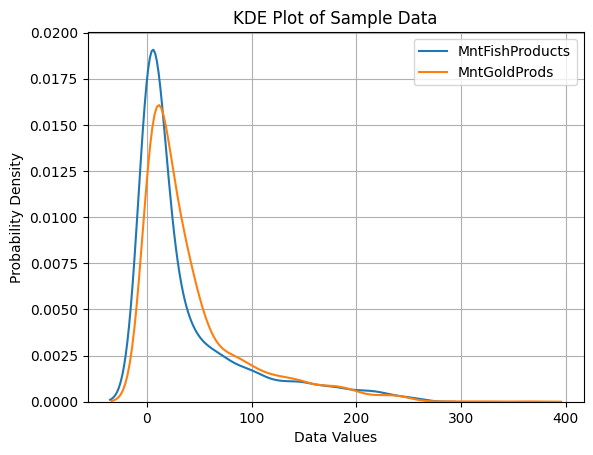

In [76]:
# KDE plot

sns.kdeplot(y3);sns.kdeplot(y6)
 
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['MntFishProducts','MntGoldProds'])
plt.grid(True)
 
# Display the plot
plt.show()

In [77]:
# Kruskal-Wallis Test
statistic, pvalue = stats.kruskal(y3,y6)
 
# Print test results
print("Test Statistic:", statistic)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("H0 ditolak: ada perbedaan median pembelian di kategori Fish dan Gold.")
else:
    print("Gagal menolak H0: median pembelian di kategori Fish dan Gold adalah sama.")

Test Statistic: 139.71376299516638
p-value: 3.074734370781371e-32
H0 ditolak: ada perbedaan median pembelian di kategori Fish dan Gold.


In [78]:
y1 = df_clean['MntWines']
y2 = df_clean['MntFruits']
y3 = df_clean['MntFishProducts']
y4 = df_clean['MntMeatProducts']
y5 = df_clean['MntSweetProducts']
y6 = df_clean['MntGoldProds']

print(y1.median())
print(y2.median())
print(y3.median())
print(y4.median())
print(y5.median())
print(y6.median())

176.0
8.0
12.0
67.0
8.0
24.5


Disimpulkan median pembelian tiap jenis produk adalah berbeda. Namun, median pembelian produk jenis Fruit dan jenis Sweet adalah sama.

### 8. Apakah rata-rata income customer yang menerima campaign sama dengan rata-rata income customer yang tidak menerima campaign?

In [79]:
# Bentuk kolom baru
df_clean["CampaignAccept"] = df_clean[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_5940\3327566936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["CampaignAccept"] = df_clean[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)


In [80]:
y1 = df_clean[df_clean["CampaignAccept"]>0]["Income"]
y2 = df_clean[df_clean["CampaignAccept"]==0]["Income"]

# Pertama akan cek distribusi income customer adalah distribusi normal atau tidak
print(stats.kstest(y1,'norm'))
print(stats.kstest(y2,'norm'))

KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(5648.0), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(1730.0), statistic_sign=np.int8(-1))


Data tidak berdistribusi normal

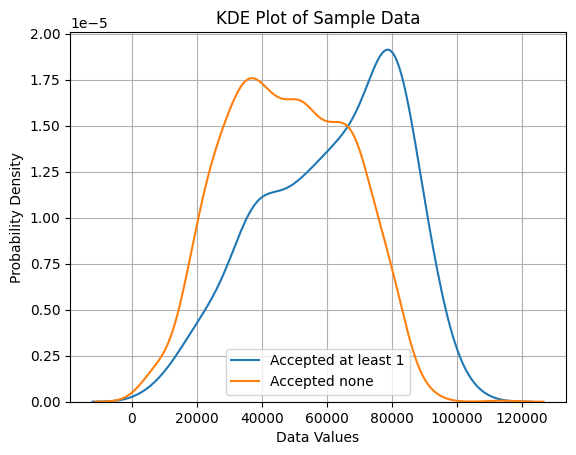

In [81]:
# KDE plot

sns.kdeplot(y1);sns.kdeplot(y2)
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['Accepted at least 1','Accepted none'])
plt.grid(True)
 
# Display the plot
plt.show()

Karena data adalah nonparametrik maka yang dibandingkan adalah median
<br>H0: Median income customer yang menerima campaign sama dengan yang tidak menerima campaign
<br>H1: Median income customer yang menerima campaign tidak sama dengan yang tidak menerima campaign

In [82]:
# Mann-Whitney U Test
statistic, pvalue = stats.mannwhitneyu(y1,y2,alternative="two-sided")
 
# Print test results
print("Test Statistic:", statistic)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("H0 ditolak: Median income customer yang menerima campaign tidak sama dengan yang tidak menerima campaign.")
else:
    print("Gagal menolak H0: Median income customer yang menerima campaign sama dengan tidak menerima campaign.")

Test Statistic: 680725.5
p-value: 4.864410738405617e-43
H0 ditolak: Median income customer yang menerima campaign tidak sama dengan yang tidak menerima campaign.


In [83]:
print(y1.median())
print(y2.median())

64504.0
47111.0


Disimpulkan median kedua grup berbeda. Dilihat dari KDE plot, median income customer yang menerima campaign lebih besar.

### 9. Apakah rata-rata total pembelian customer yang menerima campaign sama dengan rata-rata total pembelian customer yang tidak menerima campaign?

In [84]:
y1 = df_clean[df_clean["CampaignAccept"]>0]["MntTotal"]
y2 = df_clean[df_clean["CampaignAccept"]==0]["MntTotal"]

# Pertama akan cek distribusi income customer adalah distribusi normal atau tidak
print(stats.kstest(y1,'norm'))
print(stats.kstest(y2,'norm'))

KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.int64(12), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.9999997133484281), pvalue=np.float64(0.0), statistic_location=np.int64(5), statistic_sign=np.int8(-1))


Data tidak berdistribusi normal

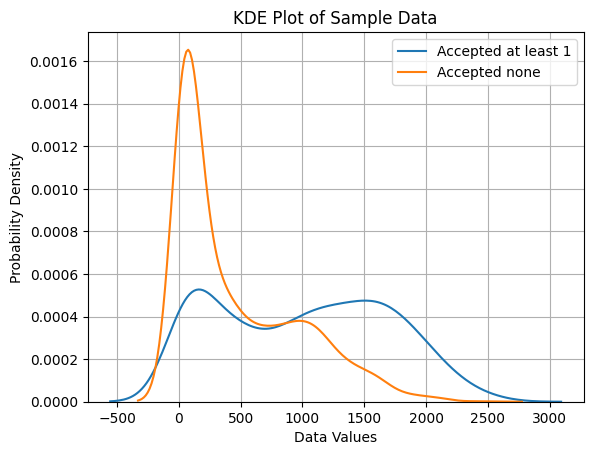

In [85]:
# KDE plot

sns.kdeplot(y1);sns.kdeplot(y2)
# Customize the plot (optional)
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('KDE Plot of Sample Data')
plt.legend(['Accepted at least 1','Accepted none'])
plt.grid(True)
 
# Display the plot
plt.show()

Karena data adalah nonparametrik maka yang dibandingkan adalah median
<br>H0: Median total pembelian customer yang menerima campaign sama dengan yang tidak menerima campaign
<br>H1: Median total pembelian customer yang menerima campaign tidak sama dengan yang tidak menerima campaign

In [86]:
# Mann-Whitney U Test
statistic, pvalue = stats.mannwhitneyu(y1,y2,alternative="two-sided")
 
# Print test results
print("Test Statistic:", statistic)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("H0 ditolak: Median total pembelian customer yang menerima campaign tidak sama dengan yang tidak menerima campaign.")
else:
    print("Gagal menolak H0: Median total pembelian customer yang menerima campaign sama dengan tidak menerima campaign.")

Test Statistic: 731413.0
p-value: 1.6819706198678847e-68
H0 ditolak: Median total pembelian customer yang menerima campaign tidak sama dengan yang tidak menerima campaign.


In [87]:
print(y1.median())
print(y2.median())

1033.0
235.0


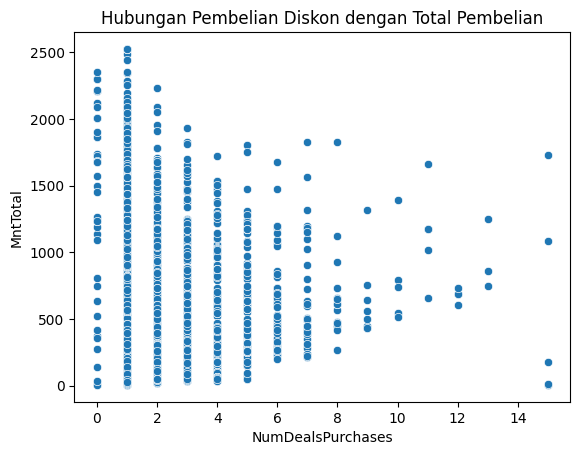

In [90]:
# Hubungan antara numdealspurchase dengan pembelian Total

# Scatter plot
sns.scatterplot(x="NumDealsPurchases",y="MntTotal", data=df_clean)
plt.title("Hubungan Pembelian Diskon dengan Total Pembelian")
plt.show()

In [88]:
df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntTotal,CampaignAccept
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,0


Disimpulkan median kedua grup tidak sama. Dilihat dari KDE plot, median total pembelian customer yang menerima campaign lebih besar.

## Actionable Recommendation

- Berikan benefit member Supermarket bagi customer yang melakukan banyak pengeluaran (mereka yang high income) sehingga mereka lebih sering mengikuti campaign dan berbelanja lebih banyak.
- Perhatikan kualitas produk Wines sekaligus memasarkan dengan lebih baik jenis produk yang lain.
- Lakukan campaign yang lebih baik dari campaign terbaru sehingga customer yang jarang membeli dapat lebih sering membeli produk lewat campaign ini.
- Bisa menargetkan campaign selanjutnya untuk orang-orang berpendidikan tinggi.
